# Comprehensive Data Analysis - Train and Test Datasets

This notebook provides a thorough exploratory data analysis of the train.csv and test.csv datasets, focusing on:
- Data structure and basic information
- Missing values analysis
- Duplicate detection
- Statistical summaries
- Data visualization
- Column-wise analysis

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Create graphs directory if it doesn't exist
graphs_dir = 'graphs'
if not os.path.exists(graphs_dir):
    os.makedirs(graphs_dir)
    print(f"Created directory: {graphs_dir}")
else:
    print(f"Directory {graphs_dir} already exists")

# Create train graphs directory if it doesn't exist
train_graphs_dir = f'{graphs_dir}/train_graphs_dir'
if not os.path.exists(train_graphs_dir):
    os.makedirs(train_graphs_dir)
    print(f"Created directory: {train_graphs_dir}")
else:
    print(f"Directory {train_graphs_dir} already exists")

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

Directory graphs already exists
Created directory: graphs/train_graphs_dir


## 1. Data Loading and Initial Inspection

In [13]:
# Load the datasets
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

print("=== TRAIN DATASET ===")
print(f"Shape: {train_df.shape}")
print(f"Columns: {list(train_df.columns)}")
print("\n=== TEST DATASET ===")
print(f"Shape: {test_df.shape}")
print(f"Columns: {list(test_df.columns)}")

=== TRAIN DATASET ===
Shape: (1460, 11)
Columns: ['item_id', 'Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m', 'Power']

=== TEST DATASET ===
Shape: (60, 12)
Columns: ['row_id', 'item_id', 'anchor_time', 'Time', 'anchor_temperature_2m', 'anchor_relativehumidity_2m', 'anchor_dewpoint_2m', 'anchor_windspeed_10m', 'anchor_windspeed_100m', 'anchor_winddirection_10m', 'anchor_winddirection_100m', 'anchor_windgusts_10m']


## 2. Dataset Analysis - Train Dataset Focus

In [14]:
# Focus on train dataset for detailed analysis
dataset_df = train_df.copy()

# Analyze dataset
dataset_head = dataset_df.head().to_string()
dataset_tails = dataset_df.tail().to_string()
dataset_shape = dataset_df.shape
rows, cols = dataset_shape

# Inspect and log head, tail, dimensions and shape
print(f"Dataset head:\n{dataset_head}")
print(f"\nDataset tail:\n{dataset_tails}")
print(f"\nDataset shape: {dataset_shape}")
print(f"Dataset has {cols} columns and {rows} rows")

Dataset head:
     item_id                 Time  temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m   Power
0  Location1  2020-01-01 12:00:00            32.1                   57         18.6           4.77            6.96                237                 238           10.8  0.8079
1  Location1  2020-01-02 12:00:00            45.0                   52         28.6           6.73           10.34                222                 222           14.1  0.8323
2  Location1  2020-01-03 12:00:00            40.2                   69         31.0           2.53            3.42                288                 291            6.7  0.1969
3  Location1  2020-01-04 12:00:00            31.9                   64         21.1           4.38            6.44                315                 316            9.3  0.1676
4  Location1  2020-01-05 12:00:00            33.7                   59         20.9           4.39   

In [15]:
# Ensure all columns are shown when printing
pd.set_option('display.max_columns', None)

# Summary statistics of numeric columns
print("Summary statistics:\n", dataset_df.describe())
print("")
print("")

# Check for missing data
missing_values = dataset_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")
print("")
print("")

# Check for duplicate rows
duplicate_rows = dataset_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Summary statistics:
        temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
count     1460.000000          1460.000000  1460.000000    1460.000000   
mean        53.056438            56.970548    36.994247       4.849795   
std         21.749782            16.399145    19.153375       2.252559   
min        -13.900000            20.000000   -20.600000       0.000000   
25%         35.375000            45.000000    22.300000       3.140000   
50%         52.100000            55.000000    35.900000       4.620000   
75%         72.500000            69.000000    53.700000       6.222500   
max         91.700000            99.000000    73.600000      14.980000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count     1460.000000        1460.000000         1460.000000    1460.000000   
mean         6.695849         210.560274          210.908904      10.093014   
std          3.323743          97.508635           97.483191       3.540612

## 3. Data Type Analysis and Time Column Processing

In [16]:
# Check data types
print("Data types:")
print(dataset_df.dtypes)
print("\n")

# Convert Time column to datetime
dataset_df['Time'] = pd.to_datetime(dataset_df['Time'])
print(f"Time column converted to datetime. Range: {dataset_df['Time'].min()} to {dataset_df['Time'].max()}")

# Check unique locations
print(f"\nUnique locations: {dataset_df['item_id'].unique()}")
print(f"Number of unique locations: {dataset_df['item_id'].nunique()}")

Data types:
item_id                 object
Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Power                  float64
dtype: object


Time column converted to datetime. Range: 2020-01-01 12:00:00 to 2020-12-31 12:00:00

Unique locations: ['Location1' 'Location2' 'Location3' 'Location4']
Number of unique locations: 4


## 4. Time-Based Visualizations for Each Column

In [17]:
# Get numeric columns (excluding item_id and Time)
numeric_columns = dataset_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns to plot: {numeric_columns}")

# Get unique locations for color coding
locations = dataset_df['item_id'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(locations)))
location_colors = dict(zip(locations, colors))

Numeric columns to plot: ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m', 'Power']


Saved: graphs/train_graphs_dir/all_variables_over_time.png


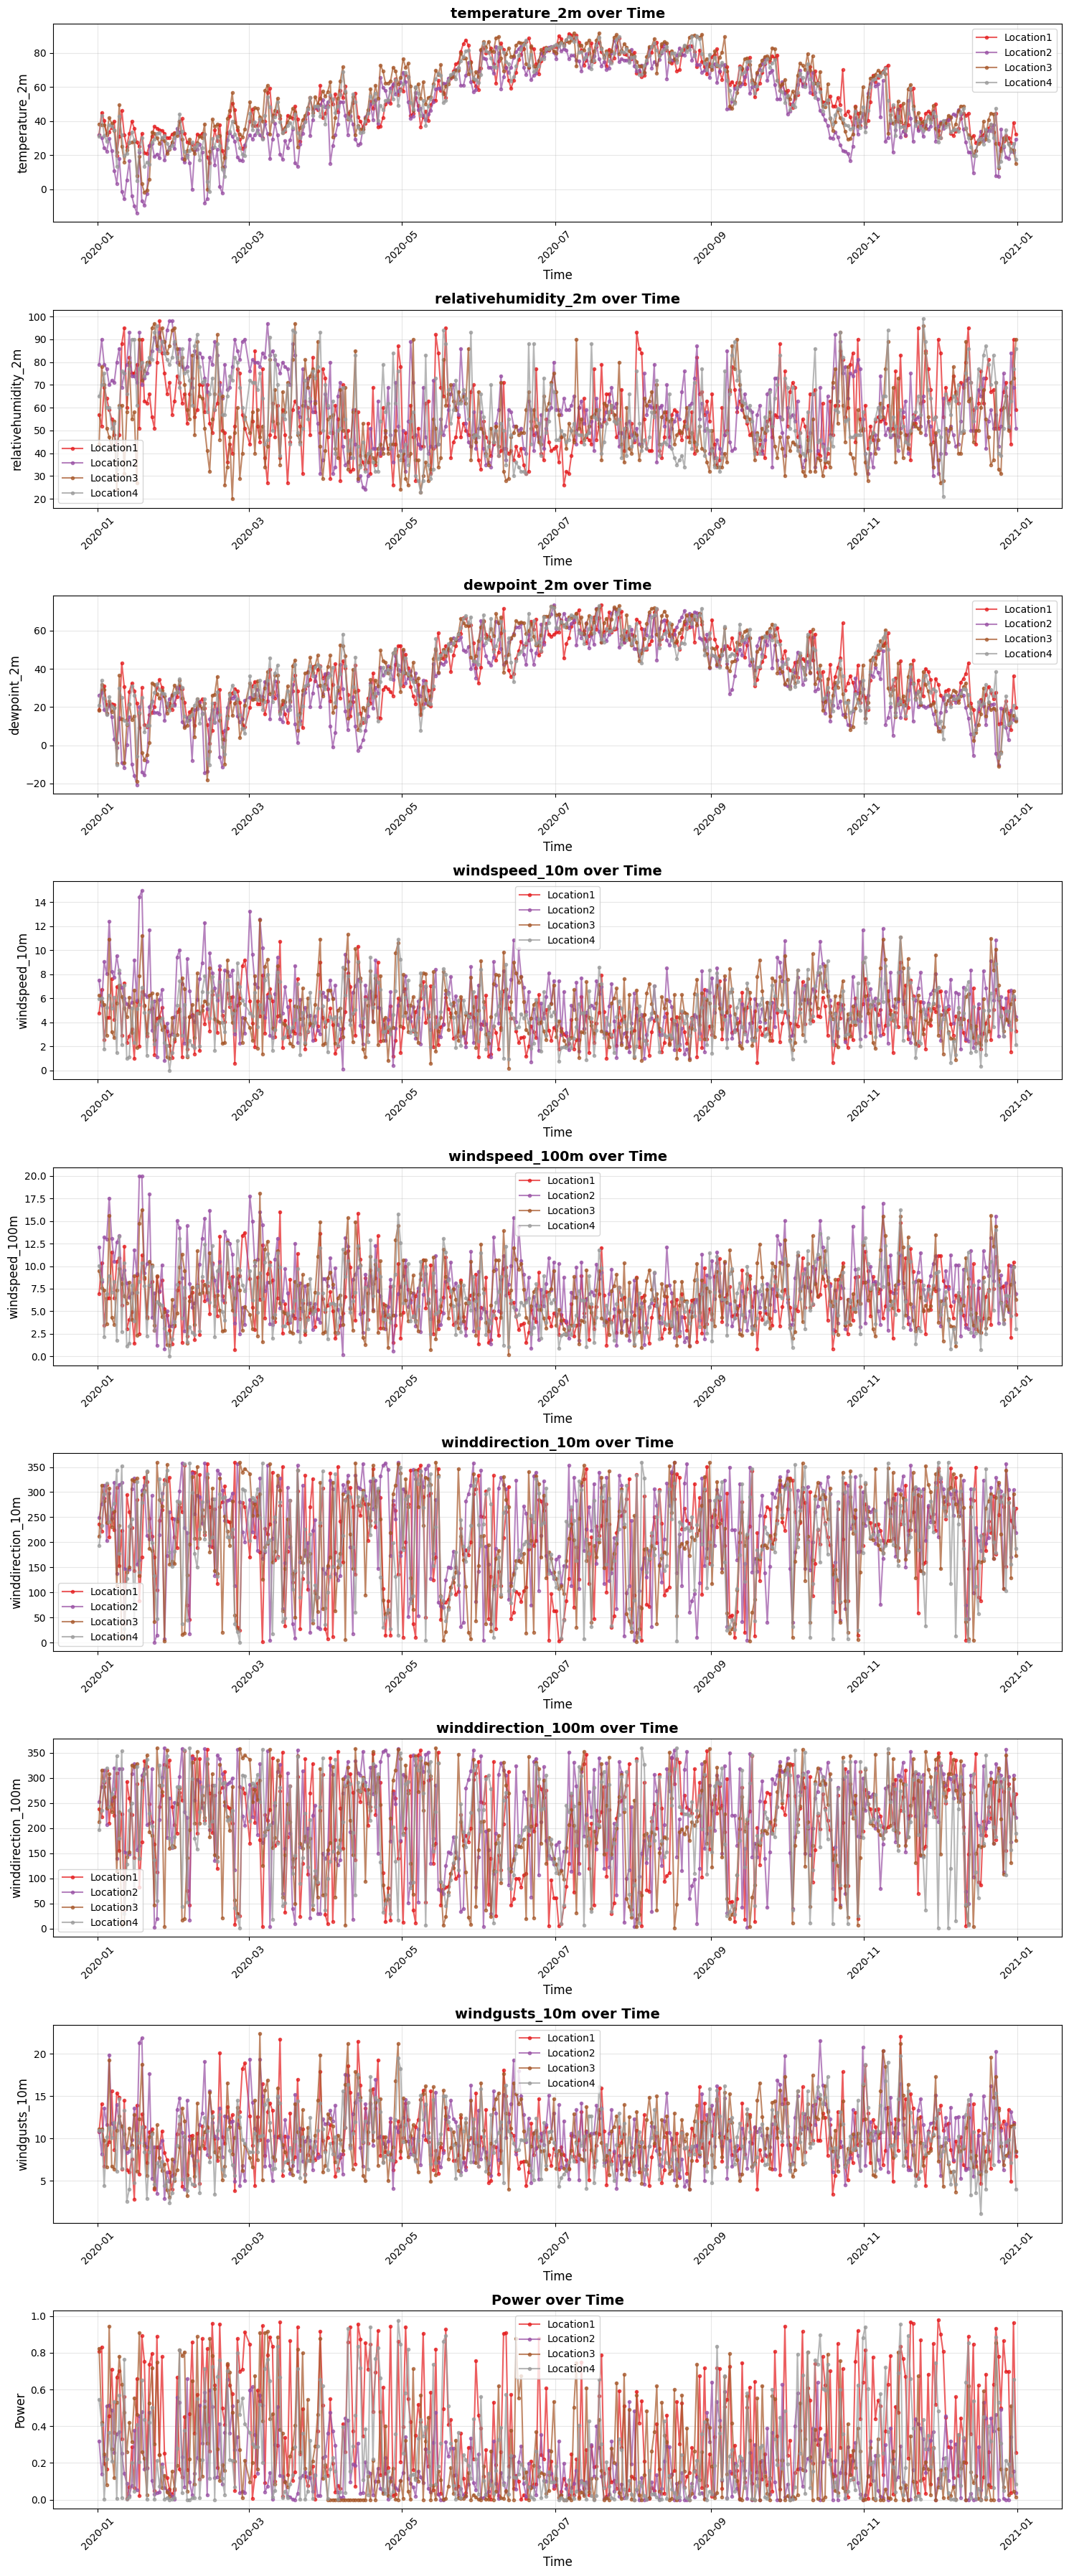

In [18]:
# Create time series plots for each numeric column
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(15, 4*len(numeric_columns)))
if len(numeric_columns) == 1:
    axes = [axes]

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    
    # Plot each location separately
    for location in locations:
        location_data = dataset_df[dataset_df['item_id'] == location]
        ax.plot(location_data['Time'], location_data[column], 
               label=location, color=location_colors[location], 
               marker='o', markersize=3, alpha=0.7)
    
    ax.set_title(f'{column} over Time', fontsize=14, fontweight='bold')
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel(column, fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
# Save the combined plot
plt.savefig(f'{train_graphs_dir}/all_variables_over_time.png', dpi=300, bbox_inches='tight')
print(f"Saved: {train_graphs_dir}/all_variables_over_time.png")
plt.show()

## 5. Individual Column Analysis with Separate Plots

Saved: graphs/train_graphs_dir/temperature_2m_over_time.png


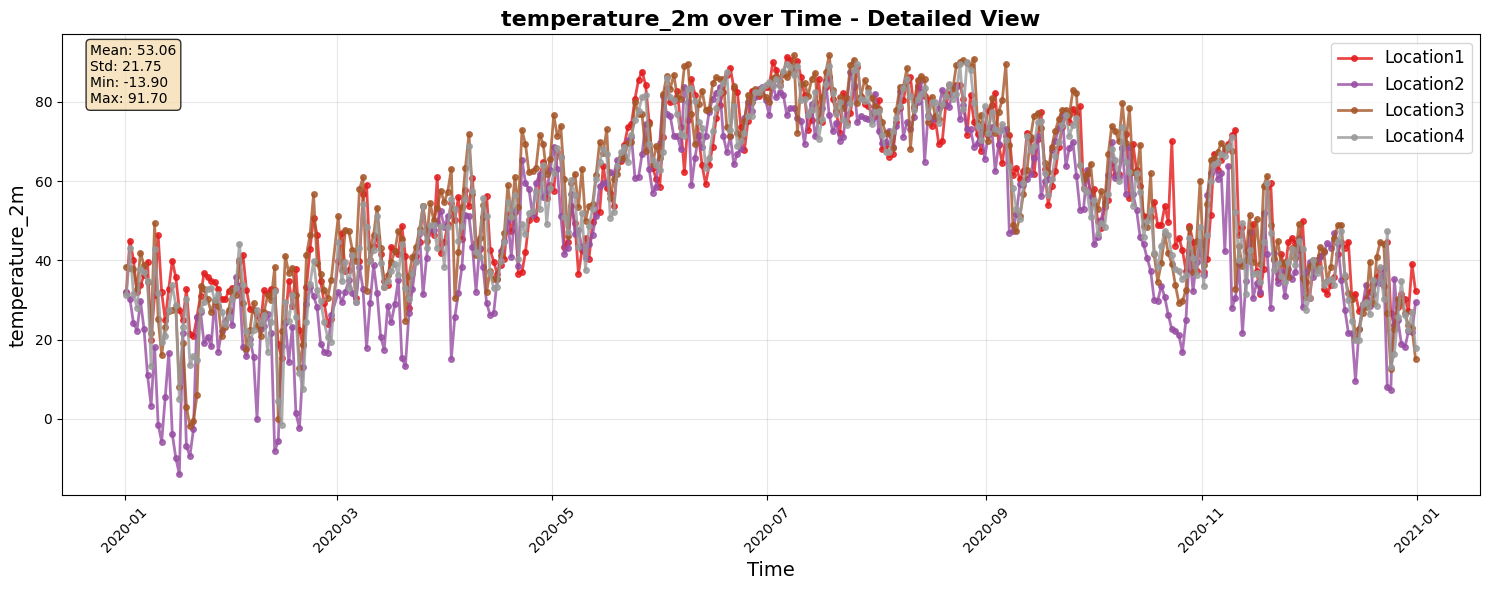

Saved: graphs/train_graphs_dir/relativehumidity_2m_over_time.png


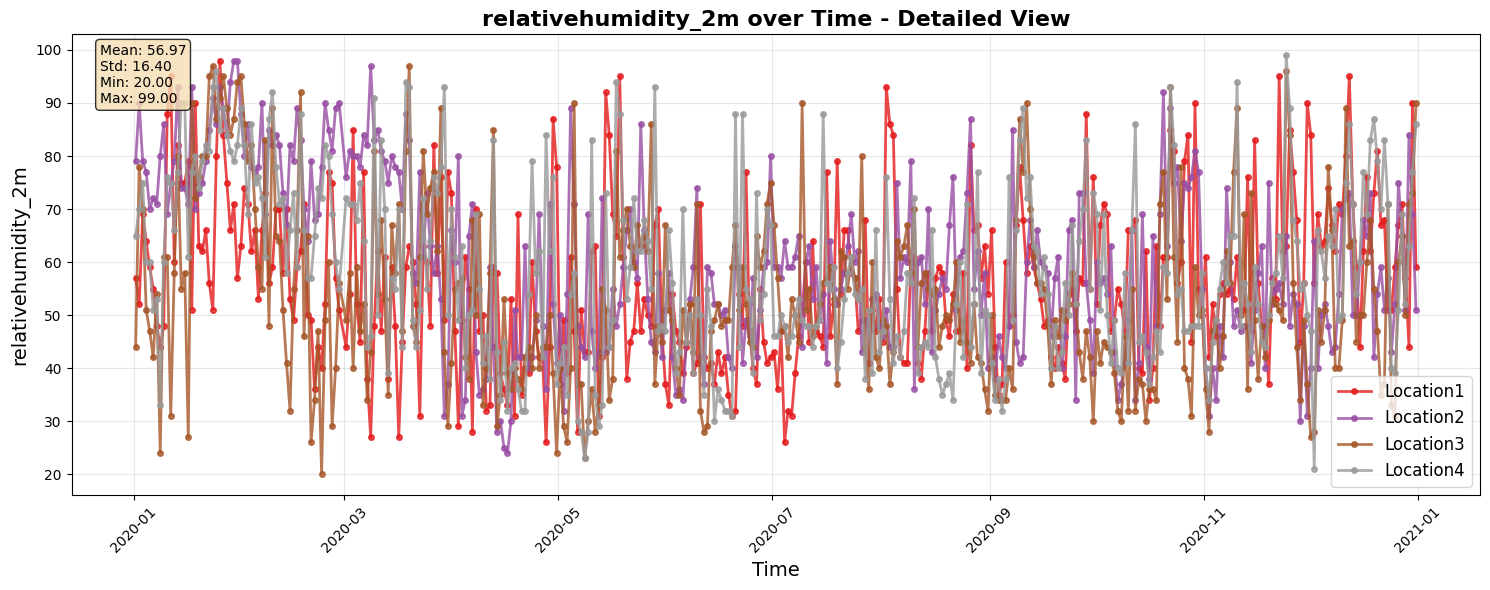

Saved: graphs/train_graphs_dir/dewpoint_2m_over_time.png


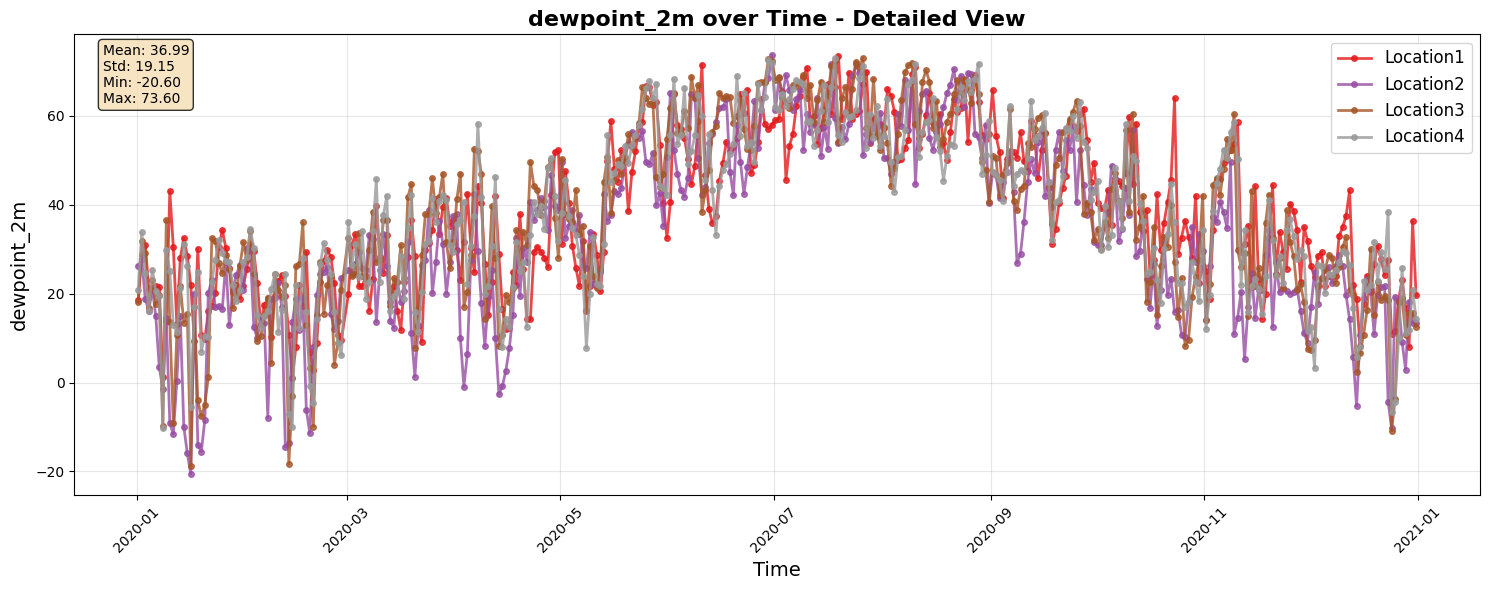

Saved: graphs/train_graphs_dir/windspeed_10m_over_time.png


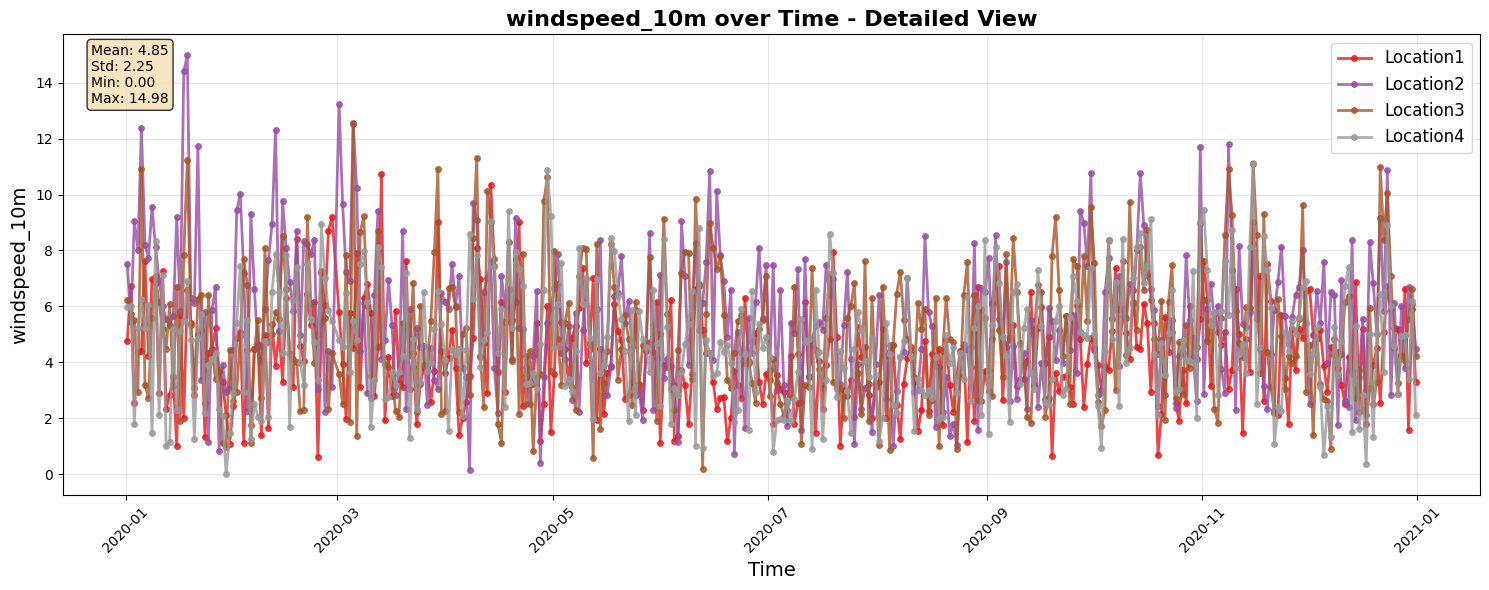

Saved: graphs/train_graphs_dir/windspeed_100m_over_time.png


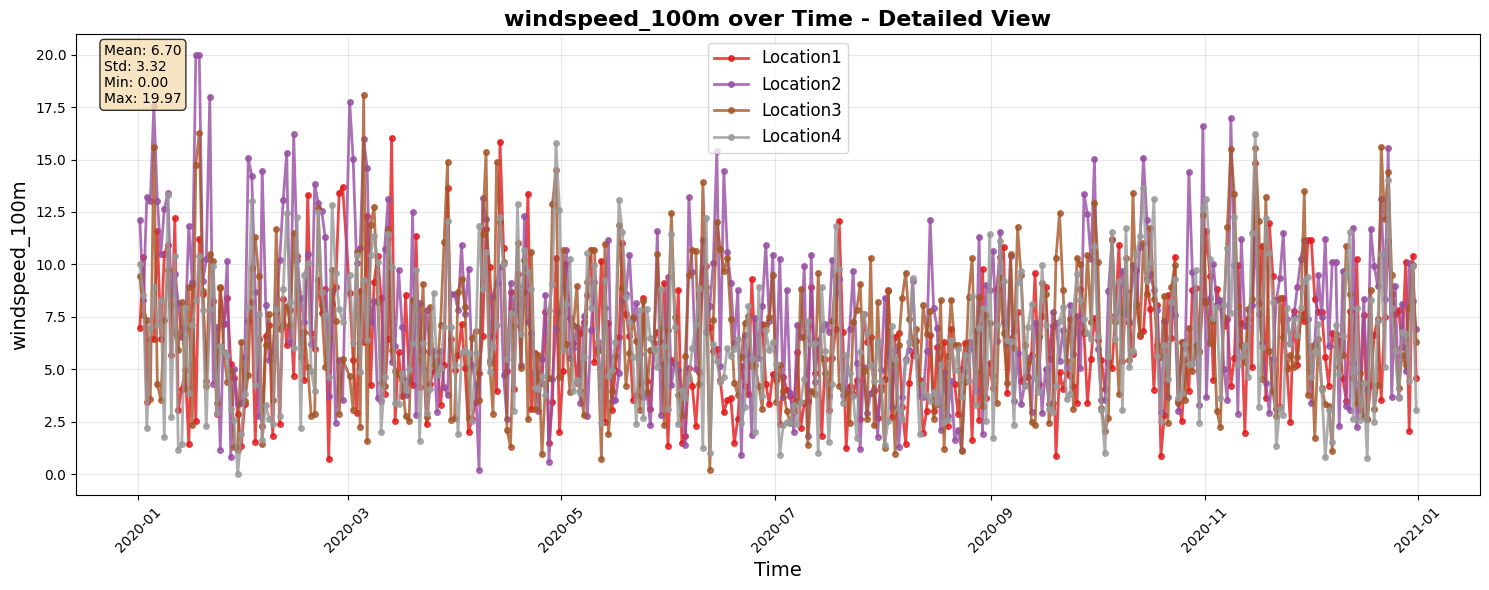

Saved: graphs/train_graphs_dir/winddirection_10m_over_time.png


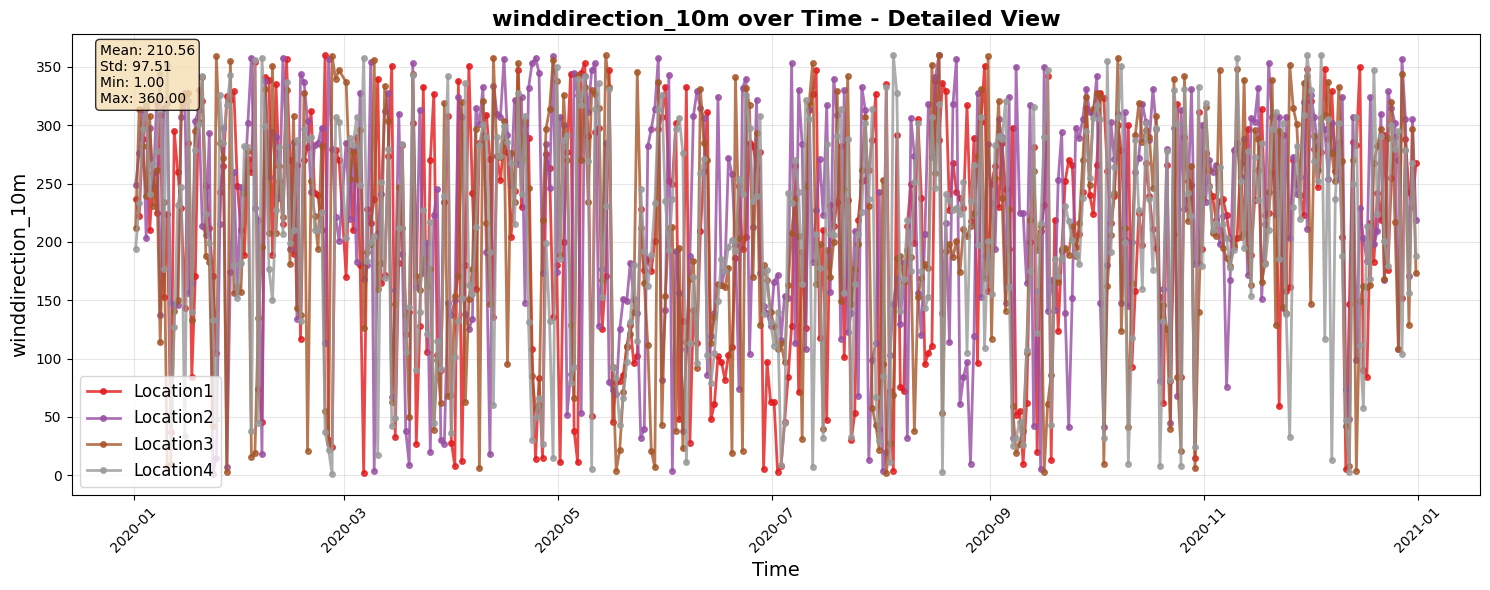

Saved: graphs/train_graphs_dir/winddirection_100m_over_time.png


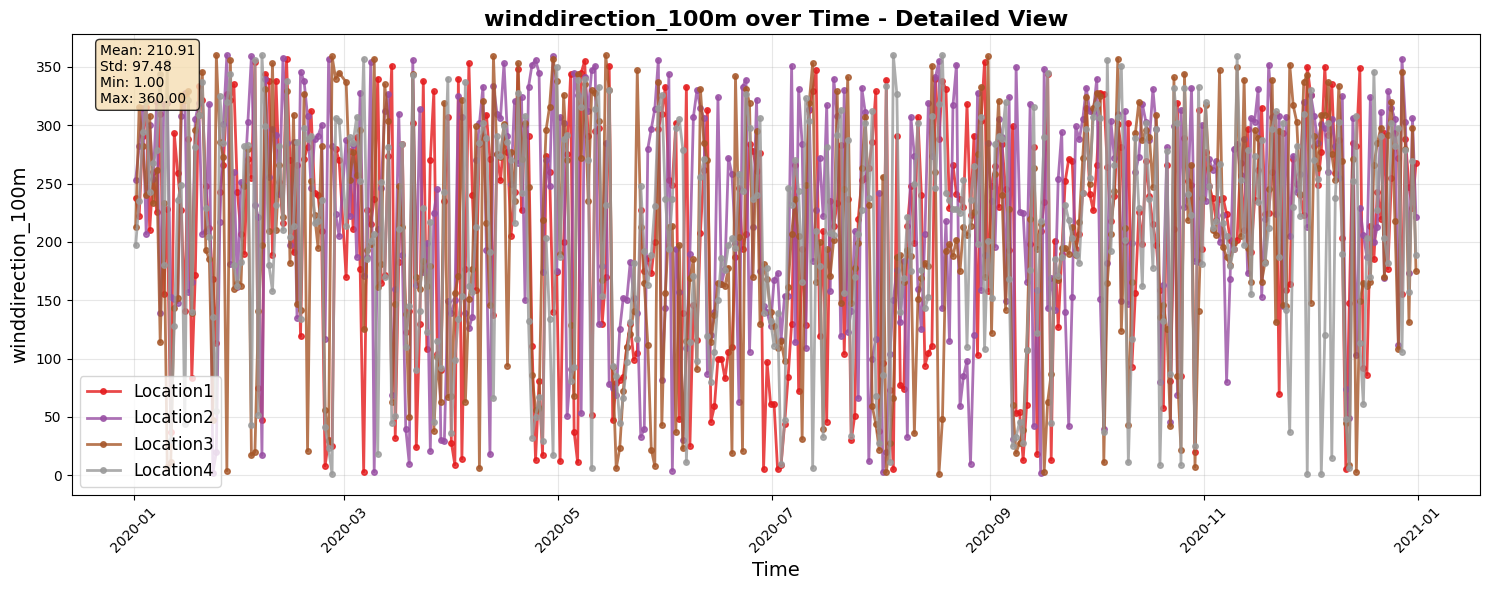

Saved: graphs/train_graphs_dir/windgusts_10m_over_time.png


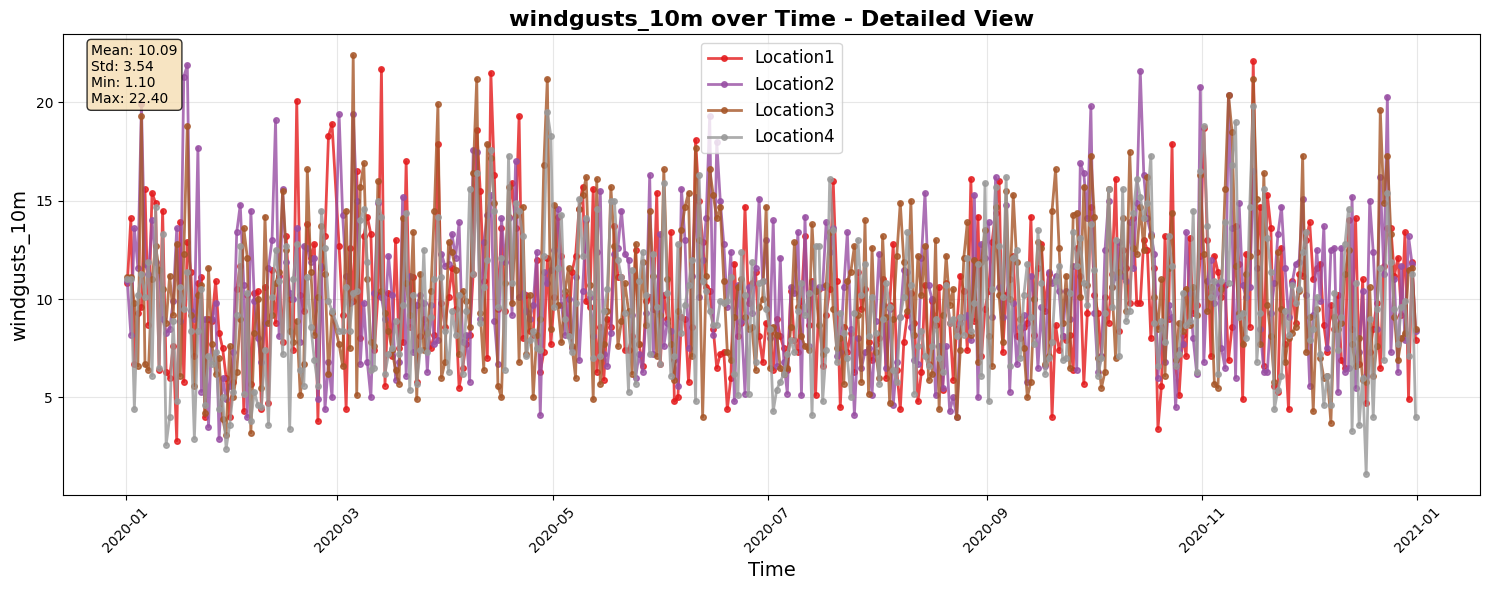

Saved: graphs/train_graphs_dir/Power_over_time.png


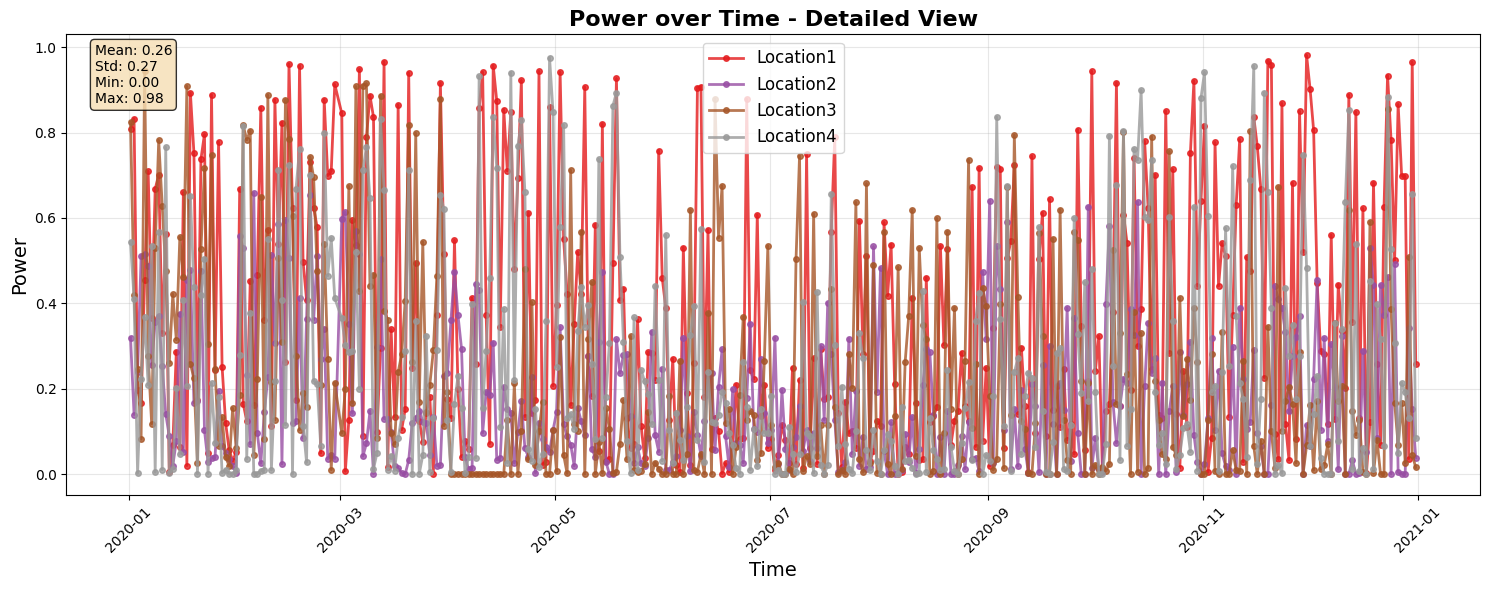

In [19]:
# Create individual plots for better visibility
for column in numeric_columns:
    plt.figure(figsize=(15, 6))
    
    # Plot each location
    for location in locations:
        location_data = dataset_df[dataset_df['item_id'] == location]
        plt.plot(location_data['Time'], location_data[column], 
                label=location, color=location_colors[location], 
                marker='o', markersize=4, linewidth=2, alpha=0.8)
    
    plt.title(f'{column} over Time - Detailed View', fontsize=16, fontweight='bold')
    plt.xlabel('Time', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Add statistics text box
    stats_text = f'Mean: {dataset_df[column].mean():.2f}\nStd: {dataset_df[column].std():.2f}\nMin: {dataset_df[column].min():.2f}\nMax: {dataset_df[column].max():.2f}'
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    # Save individual plot
    filename = f'{train_graphs_dir}/{column}_over_time.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")
    plt.show()

## 6. Correlation Analysis and Heatmap

Saved: graphs/train_graphs_dir/correlation_matrix.png


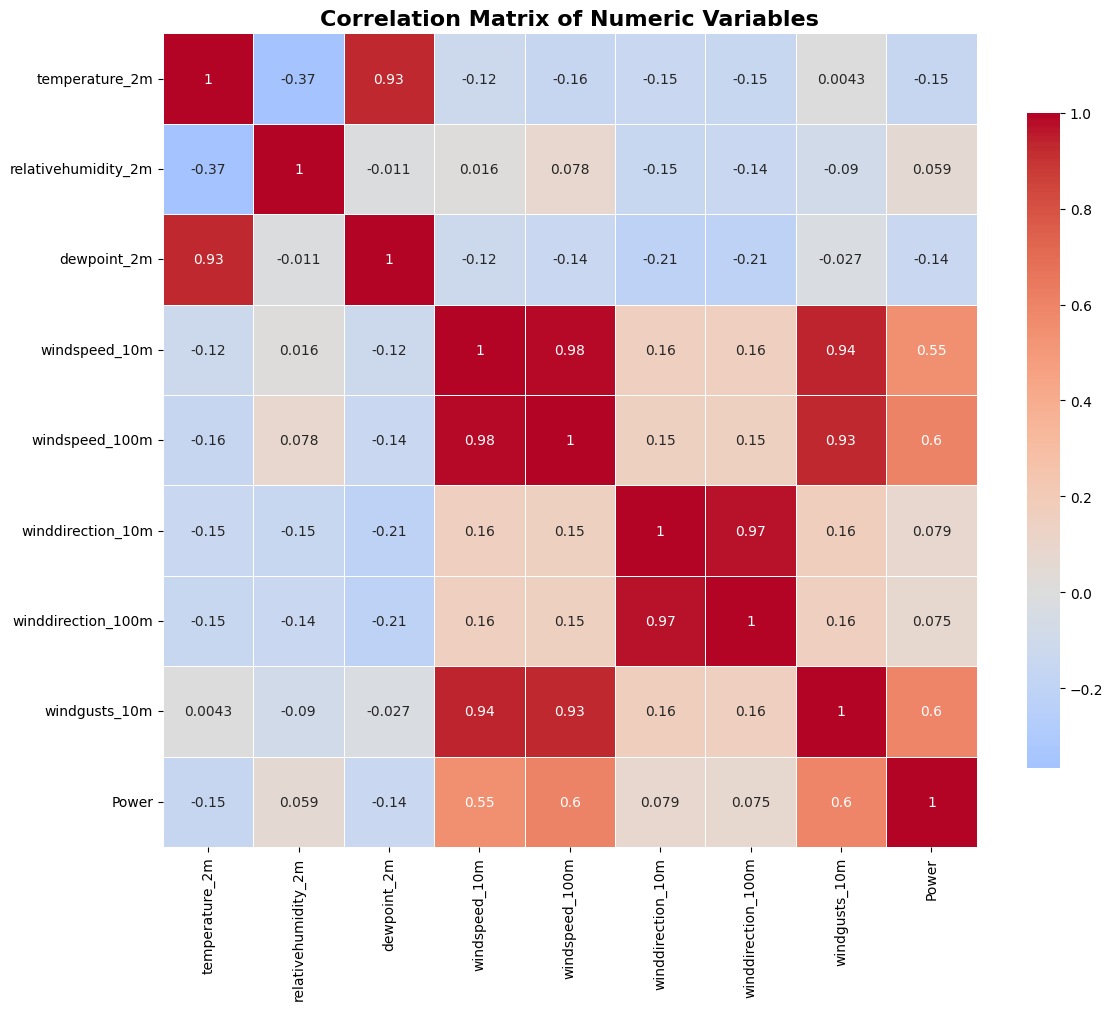


Strong correlations (|r| > 0.7):
temperature_2m vs dewpoint_2m: 0.932
windspeed_10m vs windspeed_100m: 0.985
windspeed_10m vs windgusts_10m: 0.938
windspeed_100m vs windgusts_10m: 0.927
winddirection_10m vs winddirection_100m: 0.972


In [20]:
# Calculate correlation matrix for numeric columns
correlation_matrix = dataset_df[numeric_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
# Save correlation heatmap
plt.savefig(f'{train_graphs_dir}/correlation_matrix.png', dpi=300, bbox_inches='tight')
print(f"Saved: {train_graphs_dir}/correlation_matrix.png")
plt.show()

# Print strong correlations
print("\nStrong correlations (|r| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_val:.3f}")

## 7. Distribution Analysis

Saved: graphs/train_graphs_dir/distributions_all_variables.png


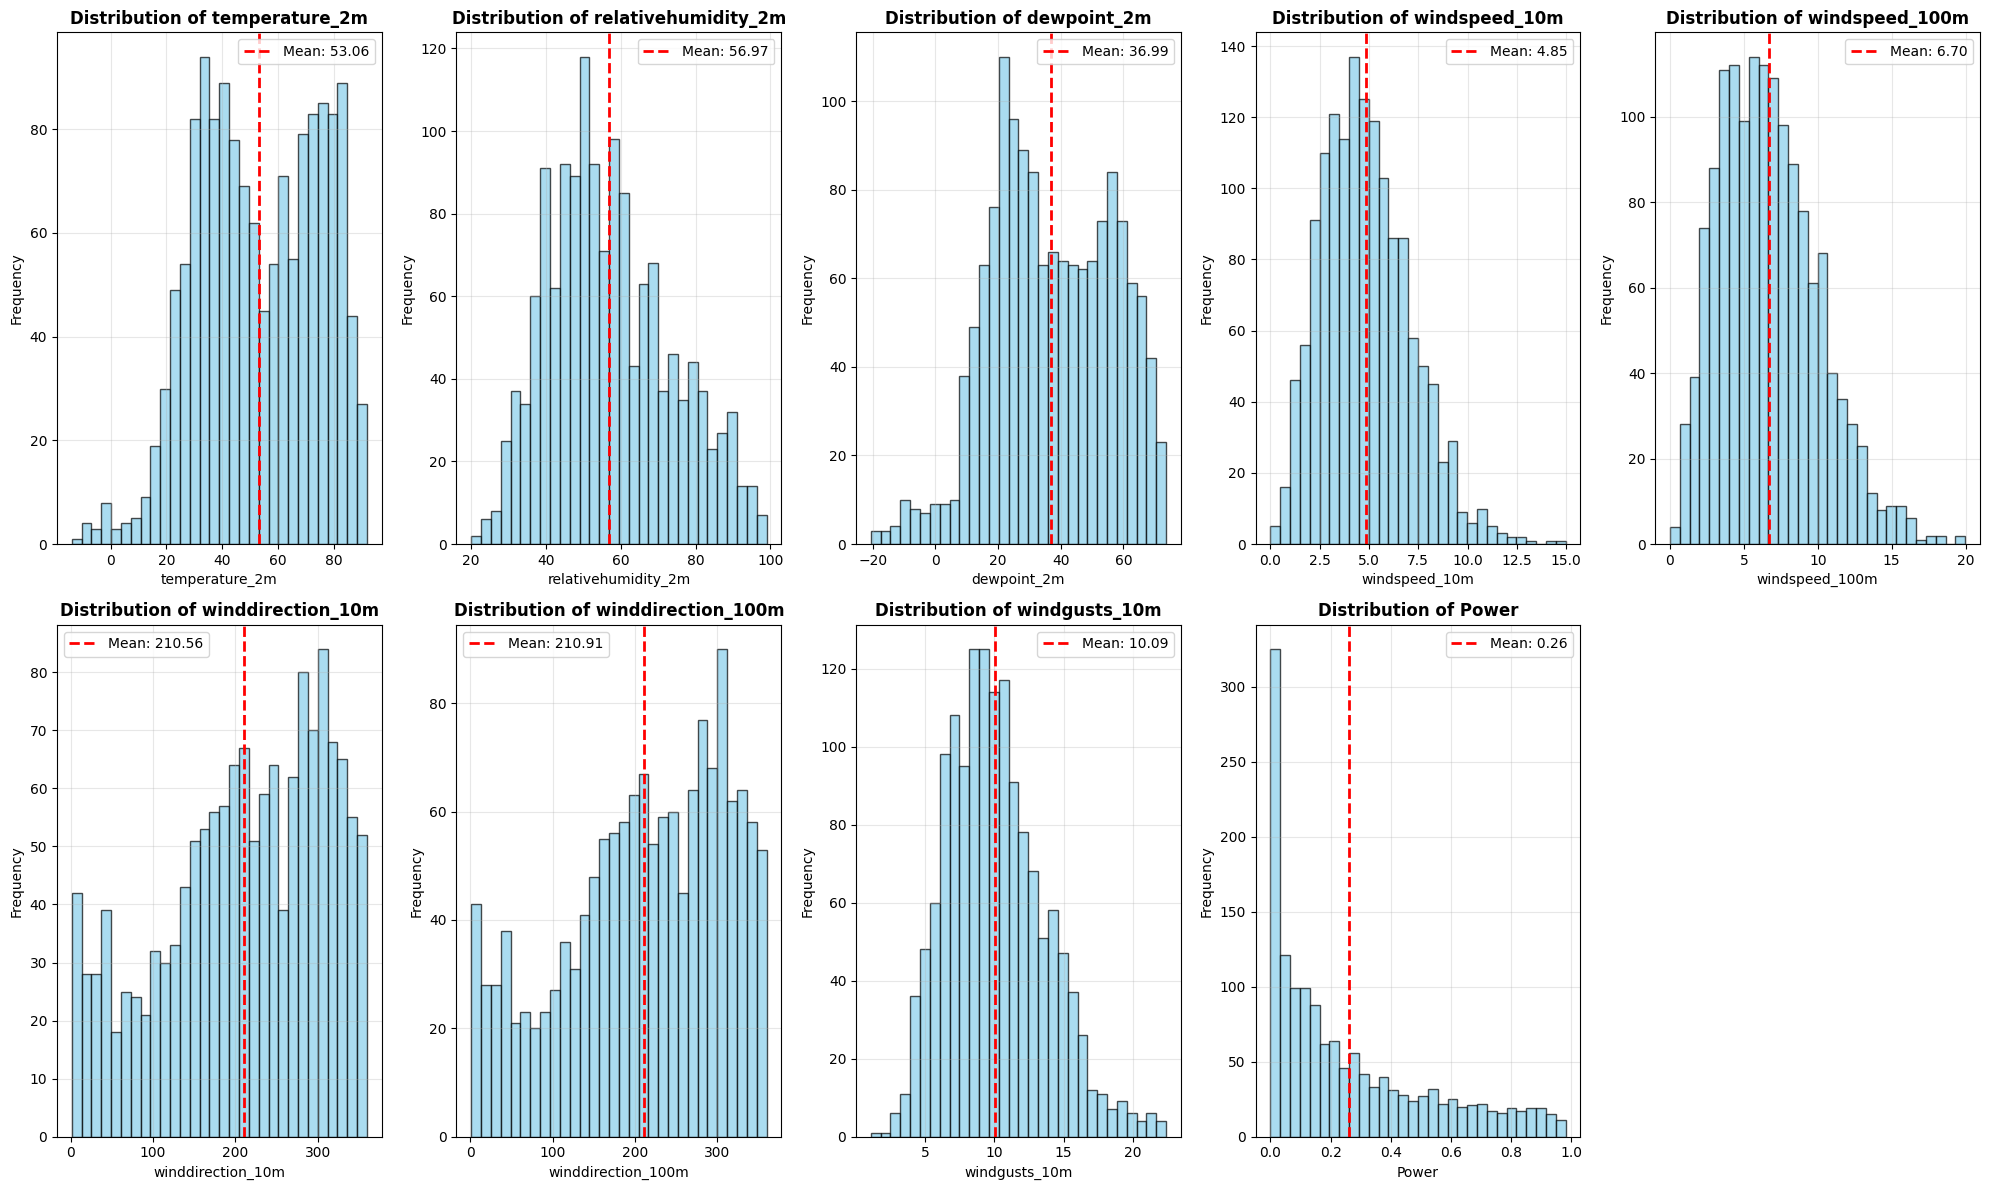

Saved: graphs/train_graphs_dir/temperature_2m_distribution.png


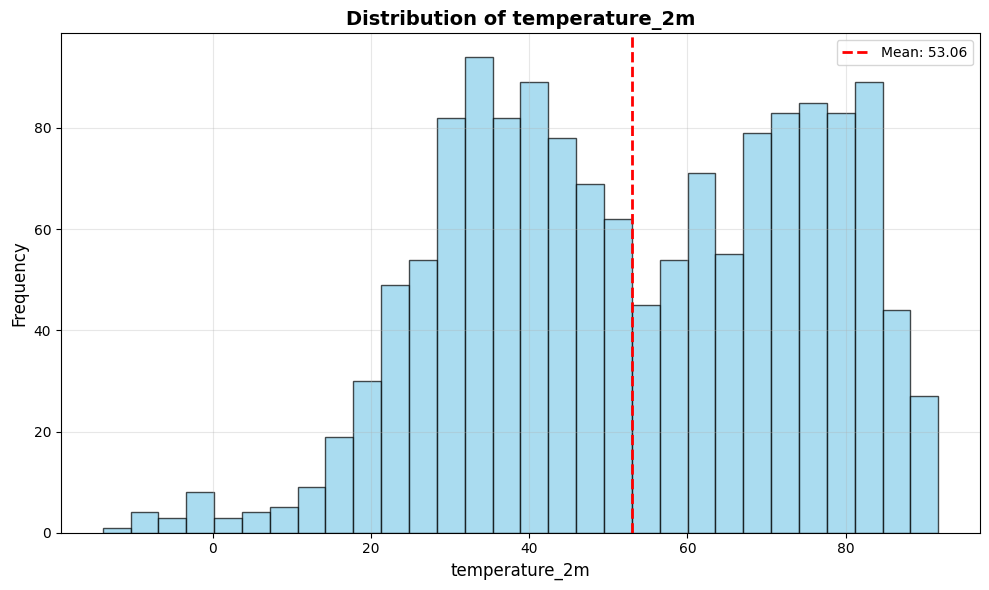

Saved: graphs/train_graphs_dir/relativehumidity_2m_distribution.png


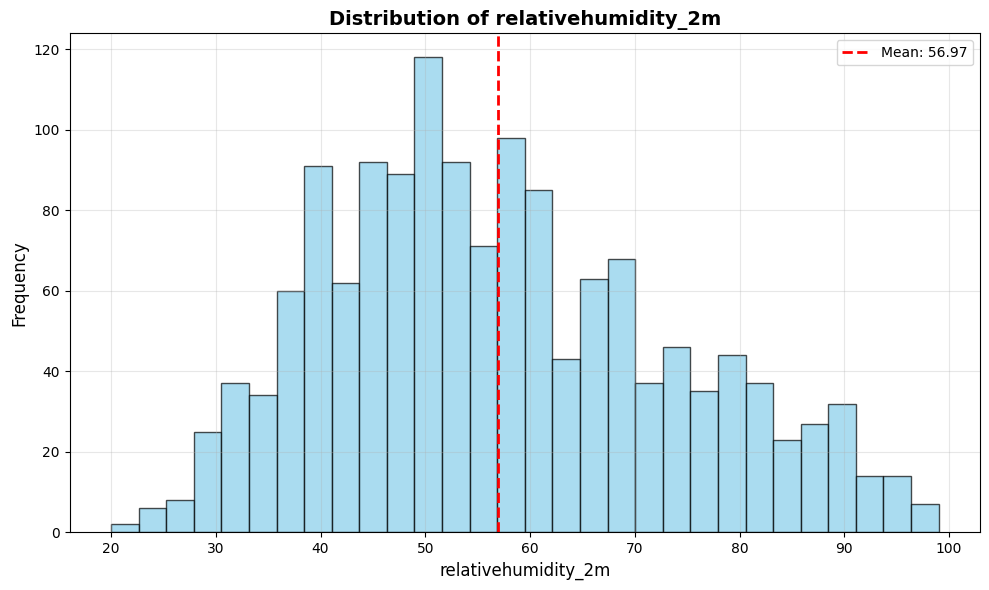

Saved: graphs/train_graphs_dir/dewpoint_2m_distribution.png


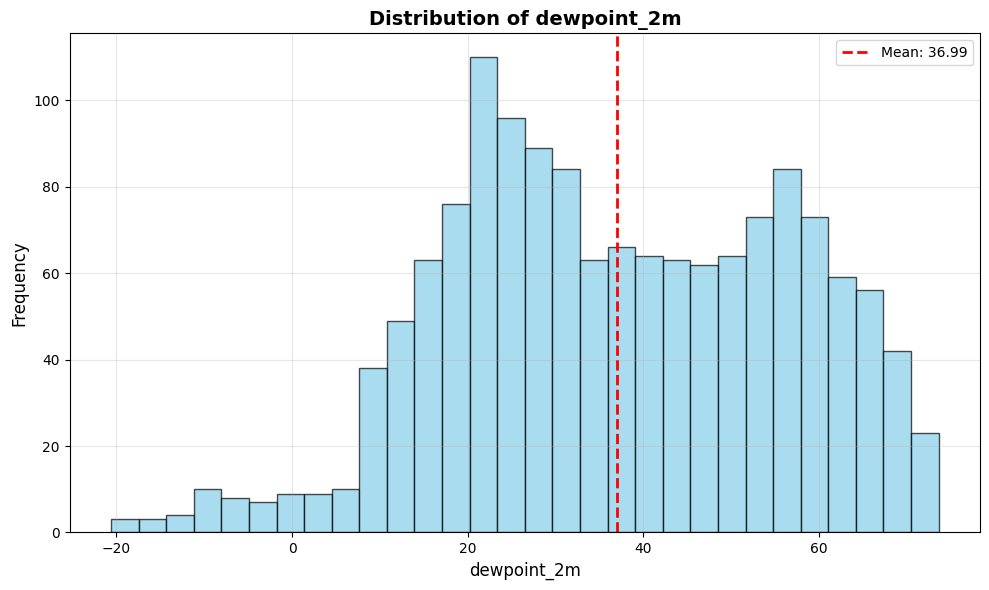

Saved: graphs/train_graphs_dir/windspeed_10m_distribution.png


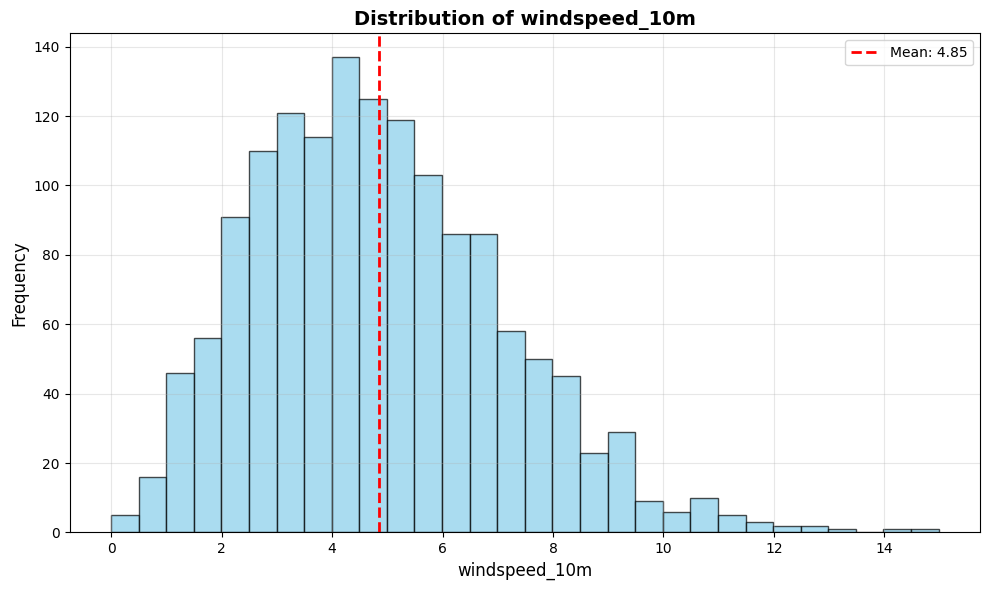

Saved: graphs/train_graphs_dir/windspeed_100m_distribution.png


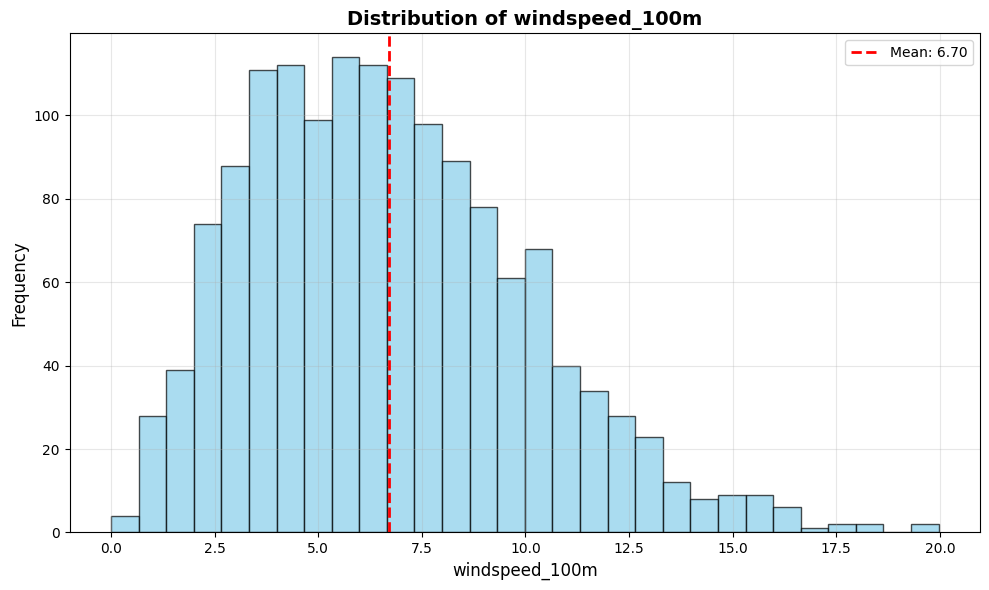

Saved: graphs/train_graphs_dir/winddirection_10m_distribution.png


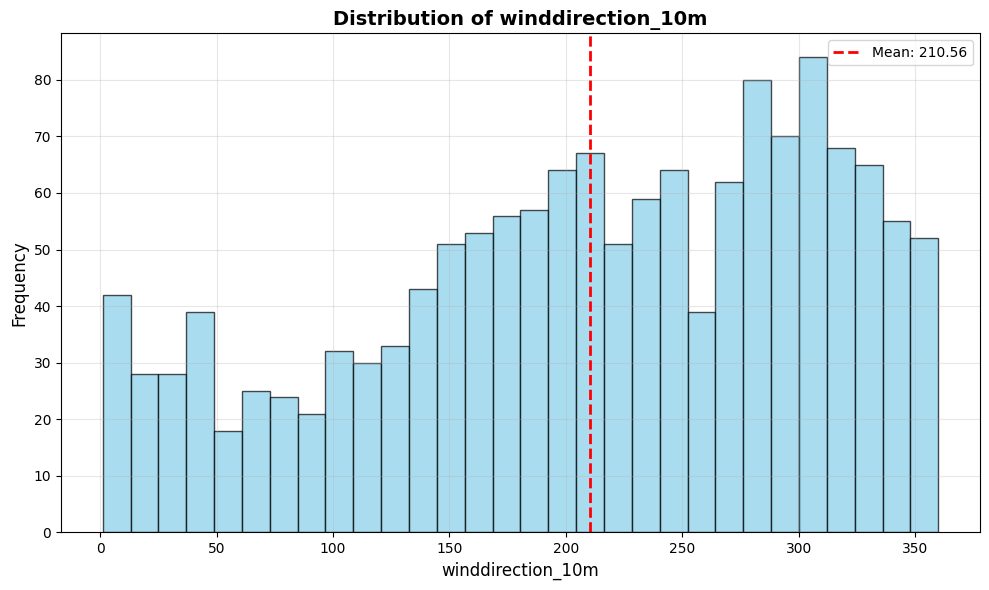

Saved: graphs/train_graphs_dir/winddirection_100m_distribution.png


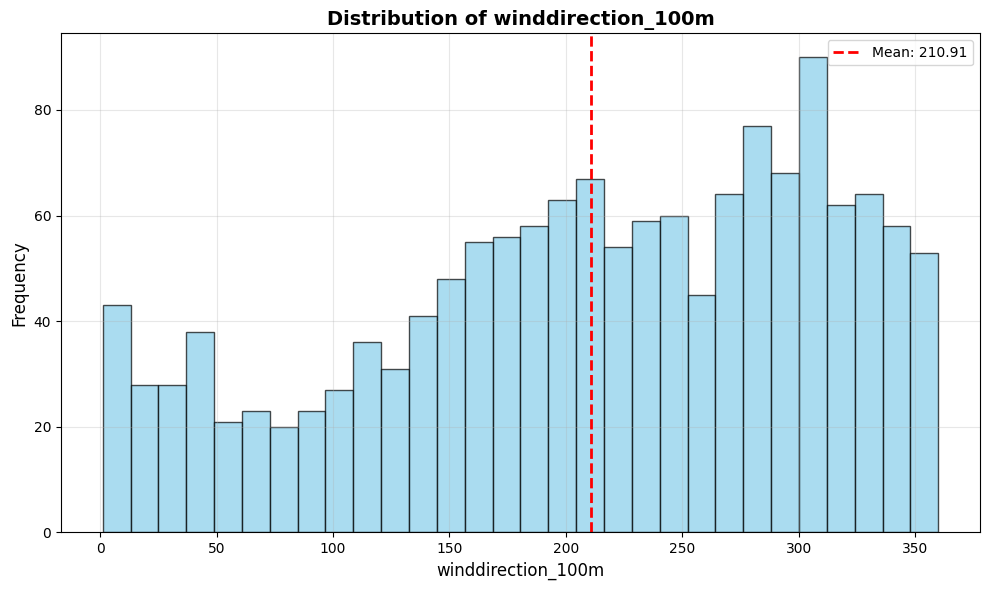

Saved: graphs/train_graphs_dir/windgusts_10m_distribution.png


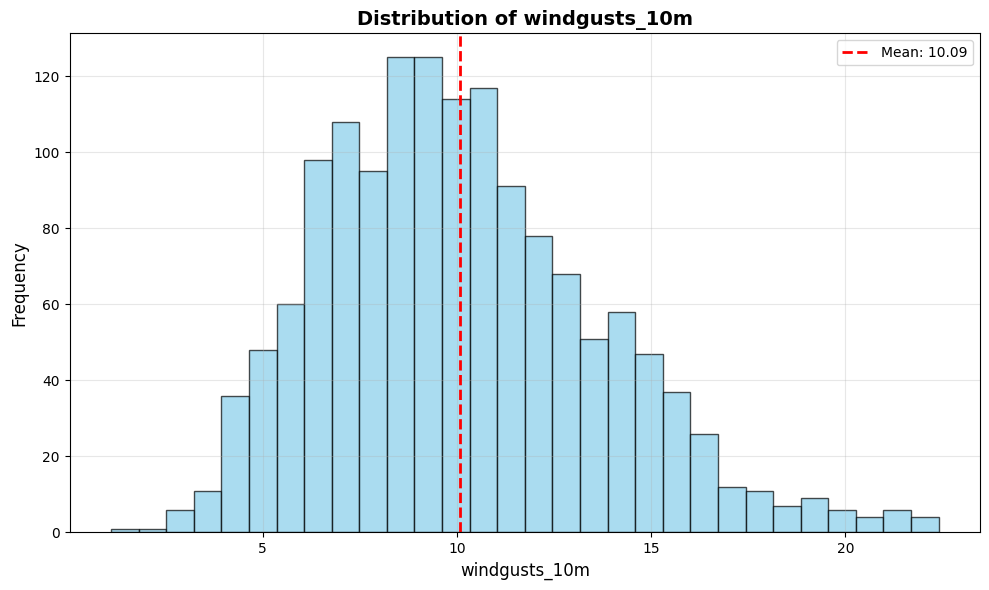

Saved: graphs/train_graphs_dir/Power_distribution.png


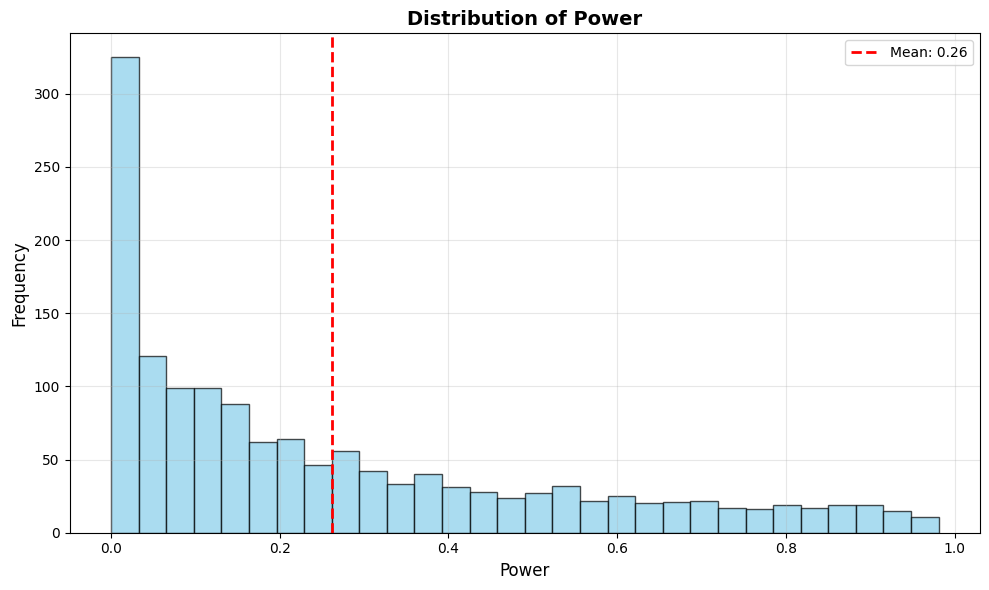

In [21]:
# Create distribution plots for each numeric column
fig, axes = plt.subplots(2, (len(numeric_columns)+1)//2, figsize=(20, 12))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for i, column in enumerate(numeric_columns):
    if i < len(axes):
        ax = axes[i]
        
        # Histogram
        ax.hist(dataset_df[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        
        # Add mean line
        mean_val = dataset_df[column].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.legend()

# Hide empty subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# Save distribution plots
plt.savefig(f'{train_graphs_dir}/distributions_all_variables.png', dpi=300, bbox_inches='tight')
print(f"Saved: {train_graphs_dir}/distributions_all_variables.png")
plt.show()

# Create individual distribution plots
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    # Histogram
    plt.hist(dataset_df[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = dataset_df[column].mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.legend()
    
    plt.tight_layout()
    # Save individual distribution plot
    filename = f'{train_graphs_dir}/{column}_distribution.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")
    plt.show()

## 8. Summary Statistics by Location

In [22]:
# Group by location and calculate summary statistics
print("Summary statistics by location:")
for location in locations:
    print(f"\n=== {location} ===")
    location_data = dataset_df[dataset_df['item_id'] == location]
    print(f"Number of records: {len(location_data)}")
    print("\nNumeric column statistics:")
    print(location_data[numeric_columns].describe())

Summary statistics by location:

=== Location1 ===
Number of records: 365

Numeric column statistics:
       temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
count      365.000000           365.000000   365.000000     365.000000   
mean        54.972329            56.205479    38.628493       4.216795   
std         19.375793            15.073409    17.072443       1.784198   
min         15.300000            26.000000     1.100000       0.600000   
25%         37.900000            45.000000    24.200000       2.950000   
50%         52.200000            55.000000    36.500000       4.140000   
75%         72.900000            66.000000    53.900000       5.220000   
max         91.300000            98.000000    73.500000      10.730000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count      365.000000         365.000000          365.000000     365.000000   
mean         6.155233         209.690411          209.252055       9.9671